In [117]:
import numpy as np
import pandas as pd
import librosa
import copy
import math
import os

In [2]:
gunShotDataPath = './Data/gunShots'
speechDataPath = './Data/newHumanSpeech'
chainSawDataPath = './Data/newChainSaw'
noiseDataPath = '../../Mubin/Data/Training/Noise'
elephantCallDataPath = './Data/newElephantCalls'

In [3]:
# Remove unwanted files

for folder in [gunShotDataPath,speechDataPath,chainSawDataPath,noiseDataPath,elephantCallDataPath]:
    for file in ['.amlignore', '.amlignore.amltmp']:
        if os.path.exists(folder+'/'+file):
            os.remove(folder+'/'+file)
    

In [4]:
for folder in [gunShotDataPath,speechDataPath,chainSawDataPath,noiseDataPath,elephantCallDataPath]:

    minFileNumber = math.inf
    maxFileNumber = -1
    for file in next(os.walk(folder))[2]:
        number = int(file.split('_')[1].split('.')[0])
        
        if number < minFileNumber:
            minFileNumber = number
        elif number > maxFileNumber:
            maxFileNumber = number

    print('File numbers for folder {} range from [{}, {}] and \n'.format(folder,minFileNumber,maxFileNumber))


File numbers for folder ./Data/gunShots range from [1, 2001] and 

File numbers for folder ./Data/newHumanSpeech range from [1, 1572] and 

File numbers for folder ./Data/newChainSaw range from [1, 1481] and 

File numbers for folder ../../Mubin/Data/Training/Noise range from [1, 3180] and 

File numbers for folder ./Data/newElephantCalls range from [1, 95] and 



### Elephant PreProcess

In [5]:
processedData_Elephant = []
elephantTag = []

for file in next(os.walk(elephantCallDataPath))[2]:

    audio,sr = librosa.load(elephantCallDataPath+'/'+file)

    # 2seconds = sr*2
    target = sr*2

    if len(audio) <= target:
        newAudio = np.append(audio,np.zeros(target-len(audio)))
        
        processedData_Elephant.append(newAudio)
        elephantTag.append('elephant_call')
    else:
        audioFileLengthInseconds = len(audio)//target
        counter = 0
        for i in range(audioFileLengthInseconds):
            newAudio = audio[counter : counter+target]
            processedData_Elephant.append(newAudio)
            elephantTag.append('elephant_call')
            counter += target

In [6]:
len(processedData_Elephant)

1443

### PreProcess GunShots

In [7]:
processedData_GunShots = []
gunShotTag = []

for file in next(os.walk(gunShotDataPath))[2]:

    audio,sr = librosa.load(gunShotDataPath+'/'+file)

    # 2seconds = sr*2
    target = sr*2

    if len(audio) <= target:
        newAudio = np.append(audio,np.zeros(target-len(audio)))
        processedData_GunShots.append(newAudio)
        gunShotTag.append('gun_shot')
    else:
        audioFileLengthInseconds = len(audio)//target
        counter = 0
        for i in range(audioFileLengthInseconds):
            newAudio = audio[counter : counter+target]
            processedData_GunShots.append(newAudio)
            gunShotTag.append('gun_shot')
            counter += target

In [8]:
len(processedData_GunShots)

2001

## Preprocess chainSaw

In [9]:
processedData_ChainSaw = []
chainSawTag = []
maxIterations = 2000

for file in next(os.walk(chainSawDataPath))[2]:
    if maxIterations <= 0:
            break
    
    audio,sr = librosa.load(chainSawDataPath+'/'+file)

    # 2seconds = sr*2
    target = sr*2

    if len(audio) <= target:
        newAudio = np.append(audio,np.zeros(target-len(audio)))
        processedData_ChainSaw.append(newAudio)
        chainSawTag.append('chain_saw')
        maxIterations-=1
    else:
        audioFileLengthInseconds = len(audio)//target
        counter = 0
        for i in range(audioFileLengthInseconds):
            newAudio = audio[counter : counter+target]
            processedData_ChainSaw.append(newAudio)
            chainSawTag.append('chain_saw')
            counter += target
        maxIterations -= audioFileLengthInseconds

In [10]:
len(processedData_ChainSaw)

2002

## Preprocess speech

In [11]:
processedData_Speech = []
speechTag = []
maxIterations = 2000

for file in next(os.walk(speechDataPath))[2]:
    if maxIterations <= 0:
            break
    
    audio,sr = librosa.load(speechDataPath+'/'+file)

    # 2seconds = sr*2
    target = sr*2

    if len(audio) <= target:
        newAudio = np.append(audio,np.zeros(target-len(audio)))
        processedData_Speech.append(newAudio)
        speechTag.append('human_speech')
        maxIterations-=1
    else:
        audioFileLengthInseconds = len(audio)//target
        counter = 0
        for i in range(audioFileLengthInseconds):
            newAudio = audio[counter : counter+target]
            processedData_Speech.append(newAudio)
            speechTag.append('human_speech')
            counter += target
        maxIterations -= audioFileLengthInseconds

In [12]:
len(processedData_Speech)

2003

## Preprocess noise

In [13]:
processedData_Noise = []
noiseTag = []
maxIterations = 2000

for file in next(os.walk(noiseDataPath))[2]:
    if maxIterations <= 0:
            break
    
    audio,sr = librosa.load(noiseDataPath+'/'+file)

    # 2seconds = sr*2
    target = sr*2

    if len(audio) <= target:
        newAudio = np.append(audio,np.zeros(target-len(audio)))
        processedData_Noise.append(newAudio)
        noiseTag.append('noise')
        maxIterations-=1
    else:
        audioFileLengthInseconds = len(audio)//target
        counter = 0
        for i in range(audioFileLengthInseconds):
            newAudio = audio[counter : counter+target]
            processedData_Noise.append(newAudio)
            noiseTag.append('noise')
            counter += target
        maxIterations -= audioFileLengthInseconds

In [14]:
len(processedData_Noise)

2000

In [15]:
totalFeatures = 1443

final_ChainSaw,finalchainSawTag = processedData_ChainSaw[:totalFeatures],chainSawTag[:totalFeatures]
final_Noise,finalnoiseTag = processedData_Noise[:totalFeatures],noiseTag[:totalFeatures]
final_Speech,finalspeechTag = processedData_Speech[:totalFeatures],speechTag[:totalFeatures]
final_GunShots,finalgunShotTag = processedData_GunShots[:totalFeatures],gunShotTag[:totalFeatures]
final_Elephant,finalelephantTag = processedData_Elephant[:totalFeatures],elephantTag[:totalFeatures]


In [16]:
audioData = final_ChainSaw + final_Noise + final_Speech + final_GunShots + final_Elephant
audioTag = finalchainSawTag + finalnoiseTag + finalspeechTag + finalgunShotTag + finalelephantTag

In [17]:
df = pd.DataFrame(list(zip(audioData, audioTag)), columns = ['audioData', 'audioTag'])

In [18]:
df['audioTag'].value_counts()

human_speech     1443
elephant_call    1443
chain_saw        1443
gun_shot         1443
noise            1443
Name: audioTag, dtype: int64

In [19]:
df

,audioData,audioTag
0,"[-0.054001212, -0.061601162, -0.06775653, -0.0...",chain_saw
1,"[0.081003785, 0.06602049, 0.04859388, 0.038290...",chain_saw
2,"[0.00041639805, -0.01920247, -0.038021803, -0....",chain_saw
3,"[-0.25337064, -0.18256235, -0.16470349, -0.227...",chain_saw
4,"[0.0021185875, -0.008524895, -0.009134769, 0.0...",chain_saw
...,...,...
7210,"[2.2838903532829136e-06, 4.770441137225134e-06...",elephant_call
7211,"[1.7580403e-05, 4.7709993e-05, -1.426485e-06, ...",elephant_call
7212,"[0.0007098784, 0.0005530115, 0.0009571959, 0.0...",elephant_call
7213,"[-2.72627e-05, 4.1527313e-05, 7.598058e-05, -9...",elephant_call


In [20]:
type(df['audioData'][0])

numpy.ndarray

In [23]:
X=np.array(df['audioData'].tolist())
y=np.array(df['audioTag'].tolist())

In [25]:
X.shape,y.shape

((7215, 44100), (7215,))

In [26]:
np.save('X.npy', X)
np.save('y.npy', y)

# Skip preprocessing and use npy files instead

## Preprocess shotgun files for train and test data

In [143]:
shotGunDataPath = './Data/shotgun'
processedData_shotGun = []
shotGunTag = []

for file in next(os.walk(shotGunDataPath))[2]:
    if file not in ['.amlignore', '.amlignore.amltmp']:

        audio,sr = librosa.load(shotGunDataPath+'/'+file)

        # 2seconds = sr*2
        target = sr*2

        if len(audio) <= target:
            newAudio = np.append(audio,np.zeros(target-len(audio)))
            processedData_shotGun.append(newAudio)
            shotGunTag.append('gun_shot')
        else:
            audioFileLengthInseconds = len(audio)//target
            counter = 0
            for i in range(audioFileLengthInseconds):
                newAudio = audio[counter : counter+target]
                processedData_shotGun.append(newAudio)
                shotGunTag.append('gun_shot')
                counter += target

processedData_shotGun = np.array(processedData_shotGun)
shotGunTag = np.array(shotGunTag)

In [144]:
X = np.load('X.npy')
y = np.load('y.npy')

### Leave Human Speech Class from X, y

In [145]:
X.shape, y.shape

((7215, 44100), (7215,))

In [201]:
unique, counts = np.unique(y, return_counts=True)
print('Before deletion of human speech class:\n')

for i in range(len(unique)):
    print('Class: {} count -> {}'.format(unique[i],counts[i]))

Before deletion of human speech class:

Class: chain_saw count -> 1443
Class: elephant_call count -> 1443
Class: gun_shot count -> 1443
Class: human_speech count -> 1443
Class: noise count -> 1443


In [202]:
tupleList = tuple(list(np.where(y=='human_speech'))[0].tolist())
X = np.delete(X, tupleList, 0)
y = np.delete(y, tupleList, 0)

In [203]:
unique, counts = np.unique(y, return_counts=True)
print('After deletion of human speech class:\n')

for i in range(len(unique)):
    print('Class: {} count -> {}'.format(unique[i],counts[i]))

After deletion of human speech class:

Class: chain_saw count -> 1443
Class: elephant_call count -> 1443
Class: gun_shot count -> 1443
Class: noise count -> 1443


In [204]:
X.shape, y.shape

((5772, 44100), (5772,))

## Model 

In [205]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0, stratify=y)

In [206]:
print('Shapes before: {} {} {} {}'.format(len(X_train), len(X_test), len(y_train), len(y_test)))

X_train=np.append(X_train, np.array(processedData_shotGun[:20]) ,axis=0)
X_test=np.append(X_test, np.array(processedData_shotGun[20:]) ,axis=0)

Shapes before: 4617 1155 4617 1155


In [207]:
y_train = np.append(y_train,shotGunTag[:20])
y_test = np.append(y_test,shotGunTag[20:])
print('Shapes after: {} {} {} {}'.format(len(X_train), len(X_test), len(y_train), len(y_test)))

Shapes after: 4637 1164 4637 1164


In [208]:
X_train[0].shape

(44100,)

In [209]:
X_train_mfcc_features = []
X_test_mfcc_features = []
numberOfMFCC = 13

for i in X_train:
    X_train_mfcc_features.append(librosa.feature.mfcc(y=i, n_mfcc=numberOfMFCC))

for i in X_test:
    X_test_mfcc_features.append(librosa.feature.mfcc(y=i, n_mfcc=numberOfMFCC))

In [210]:
X_train = np.array(X_train_mfcc_features)
X_test = np.array(X_test_mfcc_features)

In [211]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
y_train = to_categorical(labelencoder.fit_transform(y_train))

In [212]:
y_test = to_categorical(labelencoder.transform(y_test))

In [213]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.2, random_state=0, stratify=y_train)

In [214]:
X_train = X_train.reshape(-1,X_train.shape[1],X_train.shape[2],1)

X_val = X_val.reshape(-1,X_val.shape[1],X_val.shape[2],1)

X_test = X_test.reshape(-1,X_test.shape[1],X_test.shape[2],1)

In [230]:
print(X_train.shape,y_train.shape)

(3709, 13, 87, 1) (3709, 4)


In [231]:
print(X_val.shape,y_val.shape)

(928, 13, 87, 1) (928, 4)


In [232]:
print(X_test.shape,y_test.shape)

(1164, 13, 87, 1) (1164, 4)


In [225]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [241]:
model = Sequential()

model.add(Conv2D(64, kernel_size=3, input_shape=X_train.shape[1:] ))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=3))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Dense(32))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Dense(4, activation='softmax'))

In [242]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [243]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 11, 85, 64)        640       
_________________________________________________________________
batch_normalization_33 (Batc (None, 11, 85, 64)        256       
_________________________________________________________________
activation_33 (Activation)   (None, 11, 85, 64)        0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 5, 42, 64)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 3, 40, 32)         18464     
_________________________________________________________________
batch_normalization_34 (Batc (None, 3, 40, 32)         128       
_________________________________________________________________
activation_34 (Activation)   (None, 3, 40, 32)       

In [244]:
from datetime import datetime
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

num_epochs = 100
num_batch_size = 32


callbacks = [
    EarlyStopping(monitor ="val_loss", mode ="min", patience = 3, restore_best_weights = True),
    ReduceLROnPlateau(factor=0.1, patience=2, min_lr=0.00001, verbose=1),
]

start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs,callbacks=callbacks, validation_data=(X_val, y_val), verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Train on 3709 samples, validate on 928 samples
Epoch 1/100
3709/3709 [==============================] - 5s 1ms/sample - loss: 0.2838 - accuracy: 0.9337 - val_loss: 0.2333 - val_accuracy: 0.9224
Epoch 2/100
3709/3709 [==============================] - 4s 1ms/sample - loss: 0.1429 - accuracy: 0.9590 - val_loss: 0.1777 - val_accuracy: 0.9397
Epoch 3/100
3709/3709 [==============================] - 4s 1ms/sample - loss: 0.1106 - accuracy: 0.9636 - val_loss: 0.0879 - val_accuracy: 0.9688
Epoch 4/100
3709/3709 [==============================] - 4s 995us/sample - loss: 0.0979 - accuracy: 0.9679 - val_loss: 0.0866 - val_accuracy: 0.9720
Epoch 5/100
3709/3709 [==============================] - 4s 988us/sample - loss: 0.0853 - accuracy: 0.9728 - val_loss: 0.0674 - val_accuracy: 0.9731
Epoch 6/100
3709/3709 [==============================] - 4s 1ms/sample - loss: 0.0706 - accuracy: 0.9749 - val_loss: 0.0960 - val_accuracy: 0.9698
Epoch 7/100
3680/3709 [============================>.] - ETA: 0s - 

In [245]:
test_accuracy = model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.97422683


In [246]:
y_preds = model.predict(X_test)

In [247]:
for i in range(4):
    print('{} maps to: {}'.format(i,labelencoder.inverse_transform([i])[0]))

0 maps to: chain_saw
1 maps to: elephant_call
2 maps to: gun_shot
3 maps to: noise


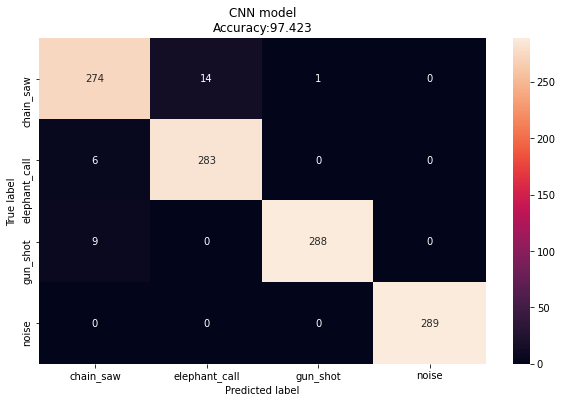

In [248]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(np.argmax(y_test,axis=-1), np.argmax(y_preds,axis=-1))

ar = ['chain_saw','elephant_call','gun_shot','noise']

cm_df = pd.DataFrame(cm,index = ar, columns = ar)

plt.figure(figsize=(10,6))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('CNN model\nAccuracy:{0:.3f}'.format(100*accuracy_score(np.argmax(y_test,axis=-1), np.argmax(y_preds,axis=-1))))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [251]:
# modelSavingPath = 'saved_models/model_2.h5'
# if os.path.isfile(modelSavingPath) is False:
#     model.save(modelSavingPath)

In [252]:
# modelJsonSavingPath = 'saved_models/model_2.json'

# # serialize model to json
# json_model = model.to_json()

# #save the model architecture to JSON file
# with open(modelJsonSavingPath, 'w') as json_file:
#     json_file.write(json_model)

In [253]:
import sklearn as sk

print(np.__version__)
print(pd.__version__)
print(librosa.__version__)
print(tf.__version__)
print(sk.__version__)

1.18.5
0.25.3
0.8.0
2.1.0
0.22.2.post1
